# Tutorial for params_MOT

This package fits various parameters to images of molecules or atoms trapped in a magneto-optical trap (MOT).

In [2]:
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.filters as filters
import seaborn as sns
import pandas as pd
import os

import math
import emcee

from params_MOT.io_package import get_data_file_path, load_data
from params_MOT.model import *
from params_MOT import MOT_image, Image_with_CCD_readout_charge, MOT_bare_model
import params_MOT as pm

from scipy.optimize import curve_fit

### Set parameters

To select a good number of "burn-in" steps set the suppressMessages parameter to True, look at the plotted traces of the walkers, and choose a step number after whihc the walkers are settled around a certain value.

array([[ 2.4636469 ,  2.61251819,  2.85143873, ...,  2.61251819,
         2.4636469 ,  2.37310956],
       [ 2.43870759,  2.58762117,  2.82660957, ...,  2.58762117,
         2.43870759,  2.34814453],
       [ 2.4138296 ,  2.56282819,  2.80195303, ...,  2.56282819,
         2.4138296 ,  2.32321483],
       ..., 
       [ 1.0751213 ,  1.07520582,  1.07534147, ...,  1.07520582,
         1.0751213 ,  1.0750699 ],
       [ 1.05005634,  1.0500956 ,  1.05015861, ...,  1.0500956 ,
         1.05005634,  1.05003247],
       [ 1.0250252 ,  1.02504275,  1.02507093, ...,  1.02504275,
         1.0250252 ,  1.02501452]])

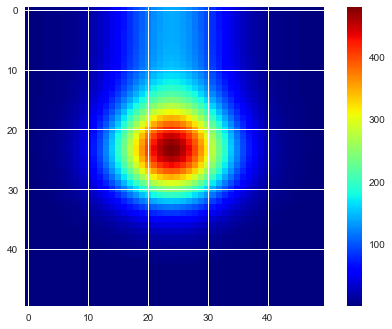

In [3]:
image_size = 50
theta = [image_size/2,image_size/2,400,image_size/7.5,image_size/9,1,1,1]
x = np.linspace(1,image_size,image_size)
y = np.linspace(1,image_size,image_size)
data = np.random.rand(image_size,image_size)
initial_guess = [25, 25, 400, 6.6667, 5.5556, 100, 20, 20]
filename=('test_1_8power.csv')
ccdnoise = 40
background_lv = 0
gen_model_data(filename, 50, theta, ccdnoise, background_lv)

In [6]:
mc_params = (200,1000,200)
a1 = find_params_MOT(filename, data_dir = '.', image_size = 50, mc_params = mc_params, initial_guess = initial_guess, suppressMessages = True)
print(a1)

emcee: Exception while calling your likelihood function:
  params: [  22.4963106    20.98518137  407.69750292   13.71390754    3.68436251
   83.38128941   28.61983354   35.30063441]
  args: (array([[  1.,   2.,   3., ...,  48.,  49.,  50.],
       [  1.,   2.,   3., ...,  48.,  49.,  50.],
       [  1.,   2.,   3., ...,  48.,  49.,  50.],
       ..., 
       [  1.,   2.,   3., ...,  48.,  49.,  50.],
       [  1.,   2.,   3., ...,  48.,  49.,  50.],
       [  1.,   2.,   3., ...,  48.,  49.,  50.]]), array([[  1.,   1.,   1., ...,   1.,   1.,   1.],
       [  2.,   2.,   2., ...,   2.,   2.,   2.],
       [  3.,   3.,   3., ...,   3.,   3.,   3.],
       ..., 
       [ 48.,  48.,  48., ...,  48.,  48.,  48.],
       [ 49.,  49.,  49., ...,  49.,  49.,  49.],
       [ 50.,  50.,  50., ...,  50.,  50.,  50.]]), array([[ 2.4636469 ,  2.61251819,  2.85143873, ...,  2.61251819,
         2.4636469 ,  2.37310956],
       [ 2.43870759,  2.58762117,  2.82660957, ...,  2.58762117,
         2.438

Traceback (most recent call last):
  File "D:\Anaconda3\lib\site-packages\emcee\ensemble.py", line 519, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "E:\Users\Daniel Ang\Dropbox\Documents\GitHub\params_MOT\params_MOT\__init__.py", line 157, in log_posterior
    return log_prior(theta) + log_likelihood(theta, x, y, data)
  File "E:\Users\Daniel Ang\Dropbox\Documents\GitHub\params_MOT\params_MOT\__init__.py", line 101, in log_likelihood
    MOT_model = Image_with_CCD_readout_charge(MOT_bare_model(x, y, theta), readout_charge) # Model is the bare model plus some CCD noise added on.
  File "E:\Users\Daniel Ang\Dropbox\Documents\GitHub\params_MOT\params_MOT\__init__.py", line 65, in MOT_bare_model
    return gaussian_2d(x, y, center_x, center_y, amplitude, sigma_x, sigma_y) + background_offset
  File "E:\Users\Daniel Ang\Dropbox\Documents\GitHub\params_MOT\params_MOT\__init__.py", line 39, in gaussian_2d
    return amplitude*gaussian_1d(x, center_x, sigma_x, 1)*gaussia

KeyboardInterrupt: 

In [7]:
print(a1)

[<params_MOT.MOT_image.MOT_image object at 0x0000017280619710>,        sigma_x   sigma_y
0.16  6.665762  5.538360
0.50  6.666666  5.555556
0.84  6.681069  5.557273]


In [8]:
a2 = find_params_MOT(filename, data_dir = '.', image_size = 50, mc_params = mc_params, initial_guess = initial_guess, suppressMessages = True)
print(a2)
a3 = find_params_MOT(filename, data_dir = '.', image_size = 50, mc_params = mc_params, initial_guess = initial_guess, suppressMessages = True)
a4 = find_params_MOT(filename, data_dir = '.', image_size = 50, mc_params = mc_params, initial_guess = initial_guess, suppressMessages = True)
a5 = find_params_MOT(filename, data_dir = '.', image_size = 50, mc_params = mc_params, initial_guess = initial_guess, suppressMessages = True)
a6 = find_params_MOT(filename, data_dir = '.', image_size = 50, mc_params = mc_params, initial_guess = initial_guess, suppressMessages = True)
a7 = find_params_MOT(filename, data_dir = '.', image_size = 50, mc_params = mc_params, initial_guess = initial_guess, suppressMessages = True)
a8 = find_params_MOT(filename, data_dir = '.', image_size = 50, mc_params = mc_params, initial_guess = initial_guess, suppressMessages = True)

[<params_MOT.MOT_image.MOT_image object at 0x0000017280658080>,        sigma_x   sigma_y
0.16  6.665665  5.548697
0.50  6.666670  5.555557
0.84  6.713482  5.752954]


In [2]:
#mc_params=(walkers, steps, burn_in_steps)
mc_params=(150, 1000, 500)

#initial_guess = [center_x, center_y, amplitude, sigma_x, sigma_y, background_offset, sigma_m, readout_charge]
initial_guess = [25, 25, 100, 10, 10, 100, 20, 60]


### Run Model on Data and Show Results

The MCMC is contained in the function find_params_MOT in model.py. This function runs MCMC using the pm.sampler function, which calls upon the emcee package to compute marginal posteriors for the model parameters. There are 8 parameters to be marginalized over, which is encompassed in the variable theta in our package. theta is an array consisting of the following parameters:
(center_x, center_y, amplitude, sigma_x, sigma_y, background_offset, sigma_m, sigma_g)
The first 5 parameters give the 2D Gaussian for the MOT. background_offset is self-explanator. sigma_m is the uncertainty in the model, and sigma_m is the uncertainty from the scattered light background. When calling upon the find_params_MOT function, we have to specify an 8-tuple consisting of the initial guesses for theta, and also the duple mc_params = (nwalkers, nsteps) which controls the parameters of the MCMC.
From there one only needs to specify the filename of the data (which is presumed to be in the root folder of params_MOT, and the function will automatically run the MCMC and conclude the best fit parameters from the 50th percentile of the final state of the walkers.

#### Note on data file title format:
The data is stored in .csv files, using the following title convention (this is important because information is stored in the title, too): <br><br>
(time in ms)\_(series number)_(fraction of maximum laser power)power.csv
<br><br>
For example, the title '3_1_16power.csv' (used in the example below) means that the picture of the MOT was taken 3 ms after realising it from the trap, that the picture is part of the 1st series, and that the laser power used is $\frac{max\_power}{16}  = \frac{60}{16} \mathrm{mW}$. Not respecting the convention should rise an error pointing this out.
<br><br>
The directory in which the data is stored is given by the data_dir parameter. Nominally, we store the data in the GitHub/params_MOT/data folder.

Loading data...
The life time of and the laser power used on the MOT are 3 ms and 1/32 (fractional units out of the max power, which is 60mW per beam)
Data loaded. Running emcee sampler...
Emcee finished. Generating plots...
       sigma_x   sigma_y
0.16  7.582324  5.325485
0.50  7.754146  5.461427
0.84  7.932390  5.597782


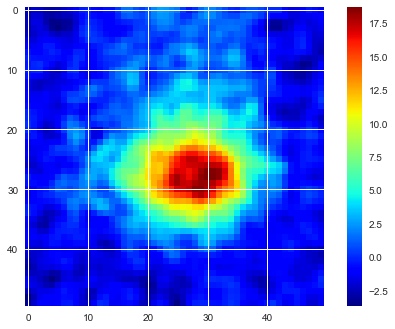

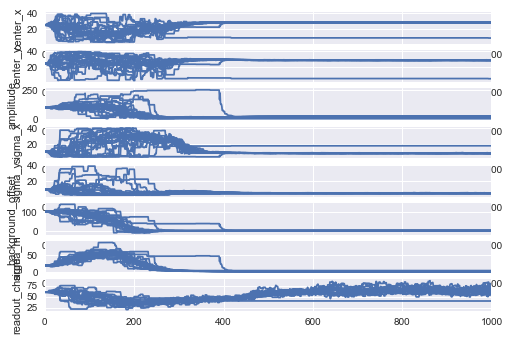

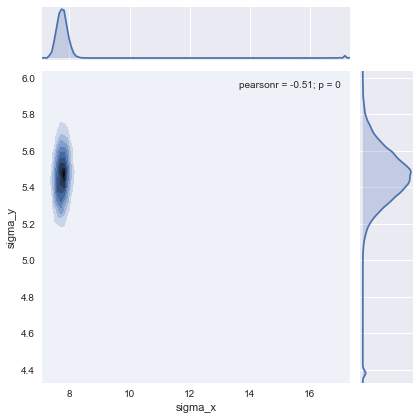

In [3]:
a = find_params_MOT('3_1_32power.csv', data_dir = 'data', image_size = 50, mc_params = mc_params, initial_guess = initial_guess, suppressMessages = False)

## Get the temperature

To get the temperature from the MOT size (i.e., from the standard deviations $\sigma_\mathrm{x}$ and $\sigma_\mathrm{y}$) we use the following formula: $$\sigma^2 = \sigma^2_{\mathrm{0}} + K_\mathrm{B} T \tau^2 /m,$$ where $\sigma$ stands for either $\sigma_{\mathrm{x}}$ or $\sigma_{\mathrm{y}}$, $\tau$ is the time, $T$ is temperature, $K_\mathrm{B}$ the Boltzmann constant, and $m$ the mass (= 59 amu = 9.80e-26 kg). 

The first step is to run the sampler on a list of data files. Belowe we get a list of all the .csv files in the folder given by the data_path string. The printed data_files array has the list of these files, which should ideally be part of the same series, with the same used power, and different times (['0.5_1_16power.csv', '2_1_16power.csv', '3_1_16power.csv', '4_1_16power.csv'] is a good example). You can change the array to drop/add files before calling the function to do the fitting to the data.

In [4]:
# Get the data files 
#(NOTE: this works if you have a folder called "data" one step up from the main repo folder; the data folder is not uploaded on GitHub)
data_path = 'data'
data_files = [f for f in os.listdir(data_path) if (os.path.isfile(os.path.join(data_path, f)) and f.split('.')[-1] == 'csv')]
separated_data_files = pm.separate_files_power(data_files)
print(separated_data_files)

[['0.5_1_8power.csv', '2_1_8power.csv', '3_1_8power.csv', '4_1_8power.csv'], ['0.5_1_16power.csv', '2_1_16power.csv', '3_1_16power.csv', '4_1_16power.csv'], ['0.5_1_32power.csv', '2_1_32power.csv', '3_1_32power.csv', '4_1_32power.csv'], ['0.5_1_64power.csv', '2_1_64power.csv', '3_1_64power.csv', '4_1_64power.csv']]


In [5]:
# Run sampler on all data files
q = find_params_MOTs(separated_data_files[1], 'data', 50, mc_params, initial_guess, suppressMessages = True)

Call function to infer the temeprature for the MOT, corresponding to each direction (for one number use formula $T = T_{\mathrm{x}}^{2/3} \times T_{\mathrm{y}}^{1/3}$).

NOTE: 
   - The true image size is 20 mm x 20 mm, so account for that too.
   - Time is in ms.
   - The power is given as the fraction of the max_power (which is 60 mW). 

     time    power   sigma_x  sigma_sigma_x   sigma_y  sigma_sigma_y  \
0  0.0005  0.00375  0.001935   1.931215e-05  0.001753   3.012639e-05   
1  0.0020  0.00375  0.002003   3.575790e-07  0.001955   8.668543e-07   
2  0.0030  0.00375  0.002113   1.202747e-07  0.002246   3.197853e-06   
3  0.0040  0.00375  0.002452   3.339086e-06  0.002335   2.990165e-07   

   sigma_x_squared  sigma_sigma_x_squared  sigma_y_squared  \
0         0.000004           3.729593e-10         0.000003   
1         0.000004           1.278628e-13         0.000004   
2         0.000004           1.446600e-14         0.000005   
3         0.000006           1.114949e-11         0.000005   

   sigma_sigma_y_squared  
0           9.075996e-10  
1           7.514363e-13  
2           1.022626e-11  
3           8.941084e-14  
The covariance matrix is 
 [[  1.75389358e-16  -1.95490960e-11]
 [ -1.95490960e-11   2.18747767e-06]]


The fitted model, including uncertainties is (0.0911 +- 0.0015)x^2 + (0 +- 0)


The covar

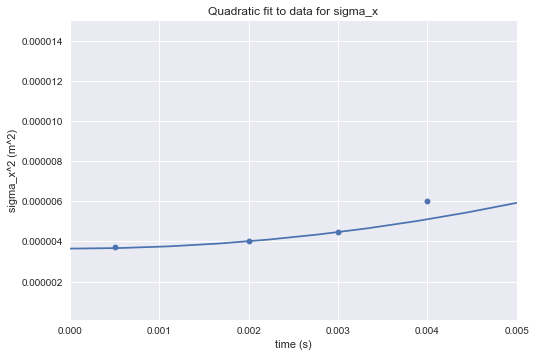

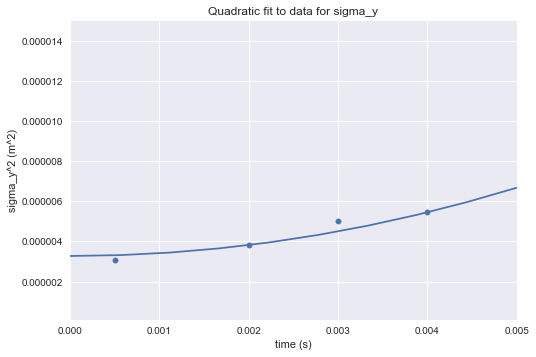

The fitted temepratures: T_x = 0.647146 mK, T_y = 0.965330 mK, T = 0.739423 mK


[0.00064714555426179923, 0.00096532954299613277, 0.00073942338344149059]

In [6]:
pm.find_MOT_temp (q, pixel_distance_ratio = 0.4*10**(-3), time_conversion_ratio = 10**(-3), max_power = 60*10**(-3), suppressMessages = False)

The temperature of $\approx 1$ mK is what we expect.

Note that the uncertainties' magnitude varies greatly for each sampler run.

### Temperature vs. power

Run the temp_vs_power function with the whole data set (different powers, different powers). The function returns a pandas dataframe which we then plot.

In [7]:
dataPowerTemp = pm.temp_vs_power(separated_data_files)

(0.0005, 0.008)

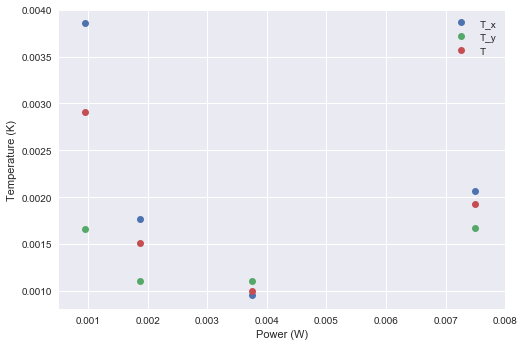

In [26]:
dataPowerTemp.plot(x = 'power', marker='o', linestyle='')
plt.ylabel('Temperature (K)')
plt.xlabel('Power (W)')
plt.gca().invert_xaxis()
plt.xlim([0.0005,0.008])